In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from sklearn.metrics import classification_report, confusion_matrix, make_scorer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import LogisticRegression

In [3]:
start_date = '2019-11-01'
end_date = '2022-10-31'

df = yf.download('META', start = start_date, end = end_date, interval = '1d', progress = False, auto_adjust = True)
df.drop(columns = ['Volume'], inplace = True)
df['Target'] = np.where(df['Close'] > df['Close'].shift(1), 1, 0)
df

,Open,High,Low,Close,Target
Date,,,,,
2019-11-01,192.850006,194.110001,189.910004,193.619995,0
2019-11-04,194.550003,197.369995,193.809998,194.720001,1
2019-11-05,195.369995,195.750000,193.600006,194.320007,0
2019-11-06,194.029999,194.369995,191.350006,191.550003,0
2019-11-07,191.910004,193.440002,189.470001,190.419998,0
...,...,...,...,...,...
2022-10-24,127.250000,133.479996,124.570000,129.720001,0
2022-10-25,130.880005,138.350006,130.589996,137.509995,1
2022-10-26,131.679993,135.550003,128.529999,129.820007,0


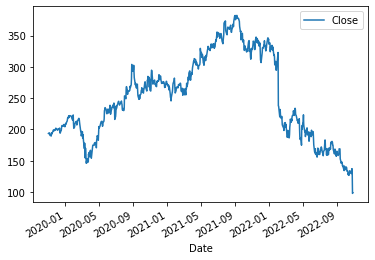

In [4]:
df.plot.line(y="Close",use_index=True)

In [5]:
df['Open_1'] = df['Open'].shift(1)
df['High_1'] = df['High'].shift(1)
df['Low_1'] = df['Low'].shift(1)
df['Close_1'] = df['Close'].shift(1)
features = ['Open_1','High_1','Low_1','Close_1']
df.dropna(inplace=True)
df[features]

,Open_1,High_1,Low_1,Close_1
Date,,,,
2019-11-04,192.850006,194.110001,189.910004,193.619995
2019-11-05,194.550003,197.369995,193.809998,194.720001
2019-11-06,195.369995,195.750000,193.600006,194.320007
2019-11-07,194.029999,194.369995,191.350006,191.550003
2019-11-08,191.910004,193.440002,189.470001,190.419998
...,...,...,...,...
2022-10-24,126.309998,130.119995,125.440002,130.009995
2022-10-25,127.250000,133.479996,124.570000,129.720001
2022-10-26,130.880005,138.350006,130.589996,137.509995


In [6]:
X = df[features].values
y = df.Target
X

array([[192.8500061 , 194.11000061, 189.91000366, 193.61999512],
       [194.55000305, 197.36999512, 193.80999756, 194.72000122],
       [195.36999512, 195.75      , 193.6000061 , 194.32000732],
       ...,
       [130.88000488, 138.3500061 , 130.58999634, 137.50999451],
       [131.67999268, 135.55000305, 128.52999878, 129.82000732],
       [ 97.98000336, 102.5       ,  96.37999725,  97.94000244]])

In [7]:
index = int(len(y)*0.9)

Logistic Regression

In [8]:
X_train, y_train = X[:index:], y[:index:]
X_test, y_test = X[index:], y[index:]
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

In [9]:
precision_score(y_test,y_pred)

0.4342105263157895

Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(X_train, y_train)
y_pred=nb.predict(X_test)

In [11]:
precision_score(y_test,y_pred)

0.4342105263157895

K-Nearest Neighbours

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [13]:
precision_score(y_test,y_pred)

0.4716981132075472

Decision Tree

In [14]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtree= DecisionTreeClassifier(max_depth=10, random_state=101, max_features = None, min_samples_leaf = 15)
dtree.fit(X_train, y_train)
y_pred=dtree.predict(X_test)

In [15]:
precision_score(y_test,y_pred)

0.4883720930232558

Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)
rfm.fit(X_train,y_train)
y_pred=rfm.predict(X_test)

In [17]:
precision_score(y_test,y_pred)

0.4146341463414634

In [18]:
df.to_csv("META.csv")